In [ ]:
# Bryan Ochoa July 25 2023 bochoa@lbl.gov

# epics integration of piezo characterization
# using epics and bluesky and ophyd to poll position of the 
# interferometer at different frequencies

In [122]:
from bluesky import RunEngine
import epics
from ophyd import EpicsSignal
from bluesky.plans import count

In [160]:
epics.cainfo("CATERETE:PICOSCALE:STREAM_STATUS")
epics.caput("CATERETE:PICOSCALE:STREAM_STATUS", 2)  

== CATERETE:PICOSCALE:STREAM_STATUS  (time_enum) ==
   value      = 1
   char_value = 'Stream active'
   count      = 1
   nelm       = 1
   type       = time_enum
   host       = 192.168.10.165:5064
   access     = read/write
   status     = 0
   char_status= NO_ALARM
   severity   = 0
   char_severity       = NO_ALARM
   timestamp  = 1690311963.494 (2023-07-25 12:06:03.49402)
   posixseconds        = 1690311963.0
   nanoseconds= 494024965
   enum strings: 
       0 = Stream inactive 
       1 = Stream active 
   PV is internally monitored, with 0 user-defined callbacks:


1

In [123]:
RE = RunEngine({})
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

0

In [124]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

In [125]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

In [131]:
device = EpicsSignal("CATERETE:PICOSCALE:POS_2")
dets = [device]



Transient Scan ID: 8     Time: 2023-07-25 12:08:24
Persistent Unique Scan ID: 'c79f794e-bbf2-4ee8-b11f-173bde6f6b32'
New stream: 'primary'
+-----------+------------+--------------------------+
|   seq_num |       time | CATERETE:PICOSCALE:POS_2 |
+-----------+------------+--------------------------+
|         1 | 12:08:24.5 |                  -778013 |
|         2 | 12:08:24.6 |                  -775081 |
|         3 | 12:08:24.6 |                  -806949 |
|         4 | 12:08:24.7 |                  -815377 |
|         5 | 12:08:24.7 |                  -802991 |
|         6 | 12:08:24.7 |                  -812884 |
|         7 | 12:08:24.7 |                  -839837 |
|         8 | 12:08:24.8 |                  -834670 |
|         9 | 12:08:24.8 |                  -795231 |
|        10 | 12:08:24.8 |                  -806766 |
|        11 | 12:08:24.8 |                  -809447 |
|        12 | 12:08:24.9 |                  -800874 |
|        13 | 12:08:24.9 |                  -8057

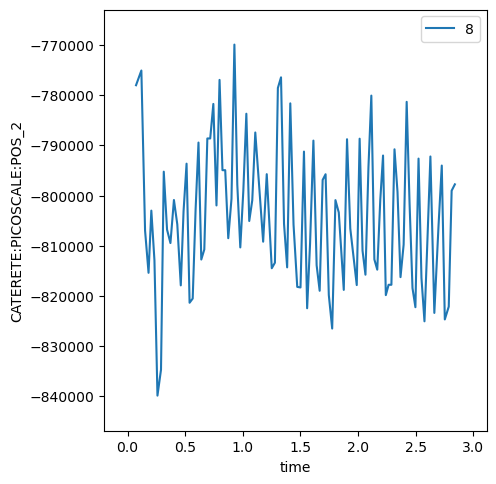

In [146]:
#epics.caput('CATERETE:PICOSCALE:STREAM_START', 2)
RE(count(dets, num = 100))
epics.camonitor_clear('CATERETE:PICOSCALE:POS_2') 

In [1]:
epics.cainfo('CATERETE:PICOSCALE:FRAMERATE')

NameError: name 'epics' is not defined